In [116]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

class Mixture:
    def __init__(self, weights, mus, sigmas):
        assert(len(mus) == len(sigmas))
        assert(len(mus) == len(weights))
        self.weights = weights
        self.size = len(mus)
        self.mus = mus
        self.sigmas = sigmas
    
    def sample_direct(self, n=10000):
        
        components = np.random.choice(range(self.size), n, p=self.weights)
        
        samples = np.zeros(0)
        bincount = np.bincount(components)
        # print list(components)
        for i in range(self.size):
            x = np.random.normal(self.mus[i], self.sigmas[i], bincount[i])
            samples = np.concatenate([samples, x])
        return samples

    def likelihood(self, x):
        import scipy.stats
        l = 0.
        for i in range(self.size):
            l += self.weights[i] * scipy.stats.norm(self.mus[i], self.sigmas[i]).pdf(x)
        return l

    def sample_monte_carlo(self, steps=10000, initial_value=0):
        
        samples = []
        current_value = initial_value
        current_ll = math.log(self.likelihood(current_value))
        acceptance_count = 0
        for i in range(steps):
            
            delta = np.random.normal(120., 10)
            if np.random.random() < 0.5:
                new_value = current_value + delta
                if new_value > 180:
                    new_value -= 360.
            else:
                new_value = current_value - delta
                if new_value < -180:
                    new_value += 360.
        
            new_ll = math.log(self.likelihood(new_value))
            
            ll_diff = new_ll - current_ll
            accept = True
            if ll_diff < 0:
                if np.random.random() > np.exp(ll_diff):
                    accept = False
            
            if accept:
                current_value = new_value
                current_ll = new_ll
                acceptance_count += 1

            samples.append(current_value)
        
        print "acceptance rate: ", acceptance_count / float(steps)
            
        return np.array(samples)

<Container object of 360 artists>

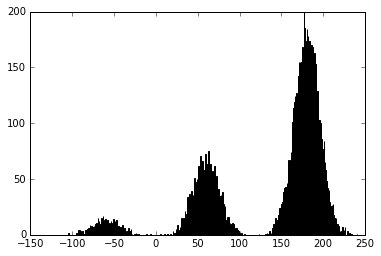

In [117]:
mixture = Mixture([0.05, 0.25, 0.7], mus=[-60., 60., 180.], sigmas=[15, 15, 15])
samples = mixture.sample_direct()
# x = np.random.normal(60, 15, 1000)
hist, bins = np.histogram(samples, bins=360)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.bar(bincenters, hist)

acceptance rate:  0.2937


<Container object of 360 artists>

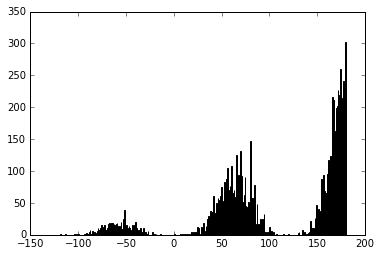

In [118]:
samples = mixture.sample_monte_carlo()
hist, bins = np.histogram(samples, bins=360)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.bar(bincenters, hist)